<h1># Medical Cost Prediction</h1>
<p>This notebook aims to predict the annual medical expenditure for customers of ACME Insurance Inc., based on various personal and lifestyle features. The predictions will help estimate insurance premiums for new customers.
</p>

<h2>Objective:</h2>
<p>- Predict medical costs based on features like age, sex, BMI, children, smoking habits, and region of residence.
</p>
<p>- Build an explainable machine learning model to support premium calculation.
</p>

<h2>Data:</h2>
<p>The dataset consists of verified historical data for over 1300 customers, including medical charges and customer details (age, sex, BMI, etc.).
</p>

<h3>Import liabraries</h3>

In [58]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

<h3>Store Data in the medical_df variable</h3>

In [3]:
medical_df = pd.read_csv('/Users/nexus/Downloads/medical_insurance.csv')

<h3>the contents of the DataFrame stored in the variable medical_df</h3>

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


<h3>concise summary of a pandas DataFrame</h3>

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


<h3>statistics for the numerical columns in a pandas DataFrame.</h3>

In [6]:
medical_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<h3>The following settings will improve the default style and font sizes for our charts.</h3>

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<h3>visualize the distribution of age using a histogram</h3>

In [8]:
medical_df.age.describe()

count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

<h3>Body Mass Index
</h3>
<p>Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.</p>

In [10]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

<h3>Charges</h3>
<p>Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.</p>

In [11]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

<h3>Smoker
</h3>
<p>Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.</p>

In [12]:
medical_df.smoker.value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [13]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

<h3>Age and Charges</h3>
<p>Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.</p>

In [14]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

<h3>BMI and Charges</h3>
<p>Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

</p>

In [15]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

<h3>Correlation</h3>

In [16]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2986236656293629)

In [17]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19984604873978873)

In [18]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7887833491419141)

In [19]:
# Mapping 'smoker' column from categorical to numeric
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)

# Mapping 'sex' column from categorical to numeric
sex_values = {'male': 0, 'female': 1}
sex_numeric = medical_df.sex.map(sex_values)

# Now, calculate the correlation between 'charges' and the numeric smoker column
corr_smoker_charges = medical_df.charges.corr(smoker_numeric)
print("Correlation between charges and smoker:", corr_smoker_charges)

# Calculate the correlation between 'charges' and the numeric sex column
corr_sex_charges = medical_df.charges.corr(sex_numeric)
print("Correlation between charges and sex:", corr_sex_charges)


Correlation between charges and smoker: 0.7887833491419141
Correlation between charges and sex: -0.06283682831973217


In [20]:
# Mapping 'smoker' column from categorical to numeric
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)

# Mapping 'sex' column from categorical to numeric
sex_values = {'male': 0, 'female': 1}
sex_numeric = medical_df.sex.map(sex_values)

# Create a new dataframe including the numeric columns (age, bmi, children, charges, smoker_numeric, sex_numeric)
numeric_df = medical_df[['age', 'bmi', 'children', 'charges']].copy()
numeric_df['smoker'] = smoker_numeric
numeric_df['sex'] = sex_numeric

# Calculate the correlation matrix
numeric_df.corr()





,age,bmi,children,charges,smoker,sex
age,1.000000,0.113048,0.037574,0.298624,-0.023286,0.026046
bmi,0.113048,1.000000,-0.001492,0.199846,0.011489,-0.042924
children,0.037574,-0.001492,1.000000,0.066442,0.006362,-0.016020
charges,0.298624,0.199846,0.066442,1.000000,0.788783,-0.062837
smoker,-0.023286,0.011489,0.006362,0.788783,1.000000,-0.082326
sex,0.026046,-0.042924,-0.016020,-0.062837,-0.082326,1.000000


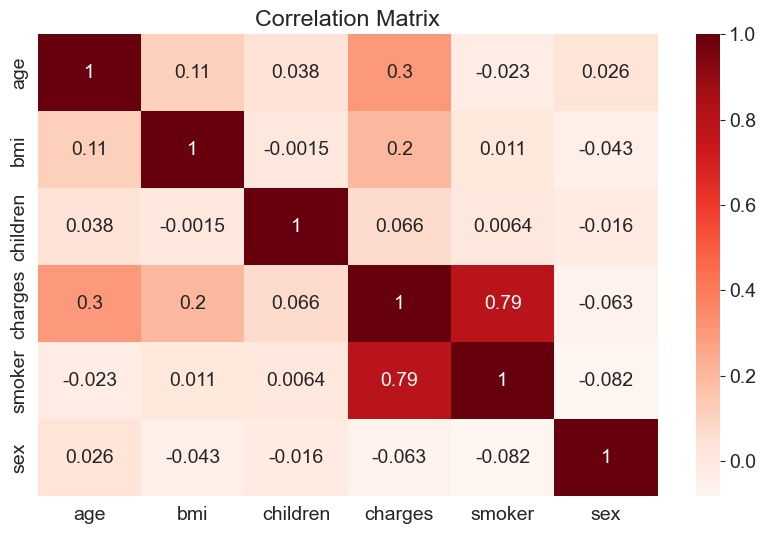

In [21]:
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

<h3> Linear Regression using a Single Feature</h3>

In [26]:
non_smoker_df = medical_df[medical_df.smoker == 'no']


<h3>relationship between "age" and "charges"</h3>

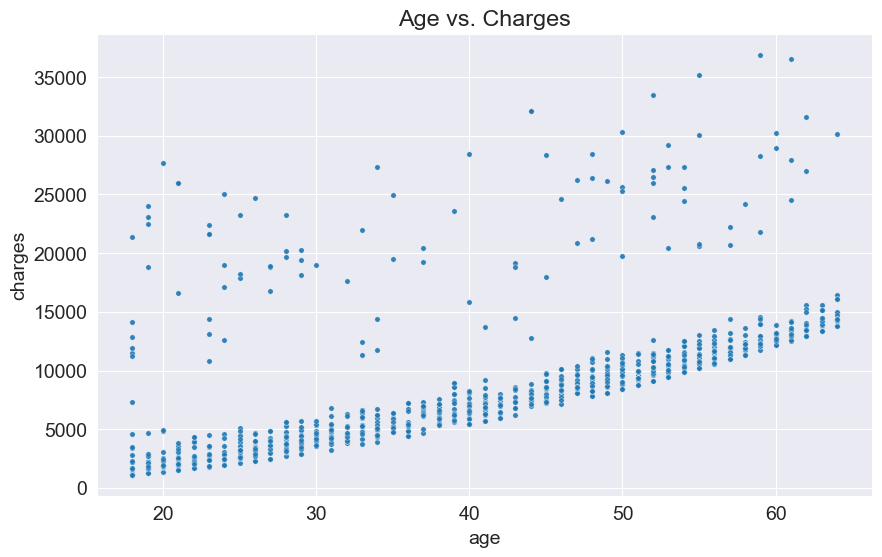

In [24]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

<h3>Let define a helper function estimate_charges, to compute charges</h3>

In [27]:
def estimate_charges(age, w, b):
    return w * age + b

<h3>The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.</h3>

In [28]:
w = 50
b = 100

In [29]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

<h3>We can plot the estimated charges using a line graph.</h3>

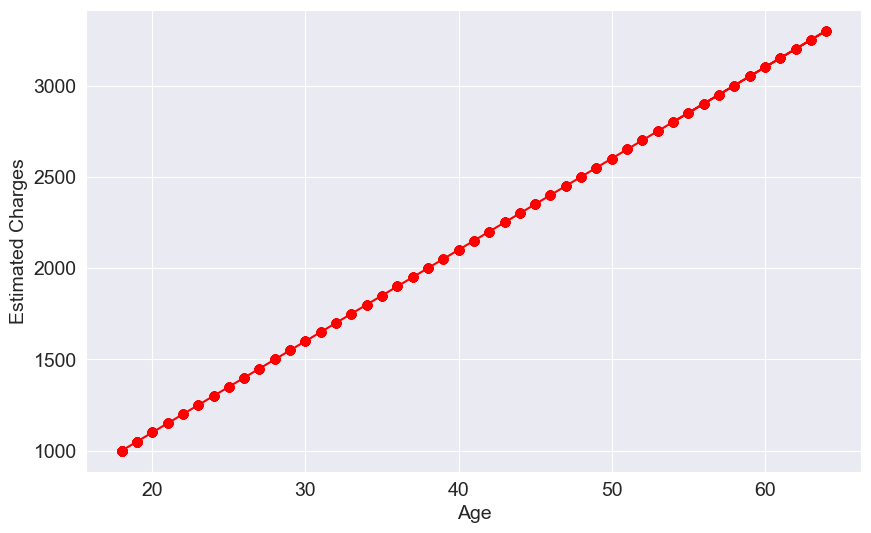

In [30]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

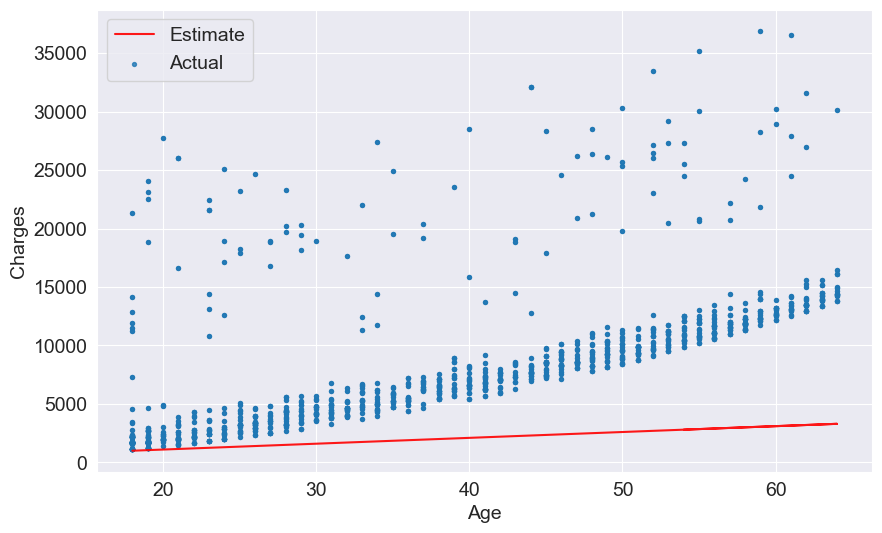

In [31]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [33]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

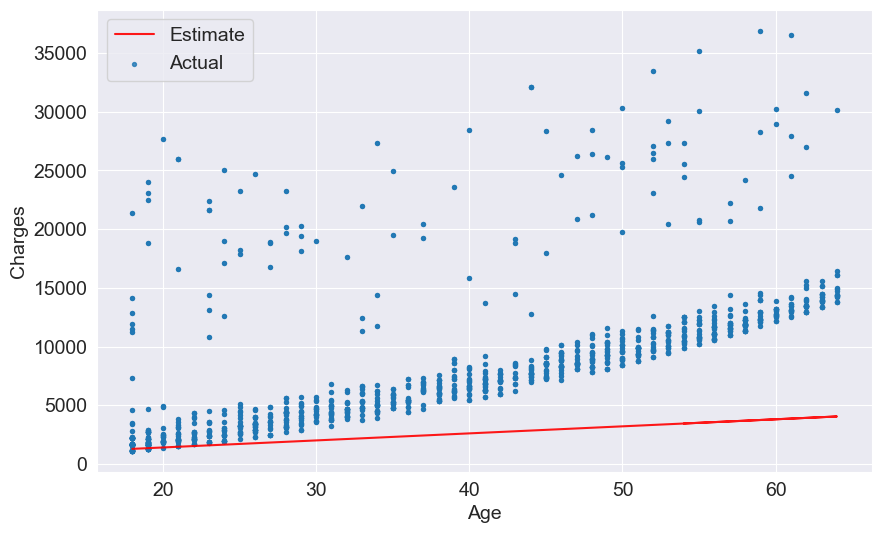

In [34]:
try_parameters(60, 200)

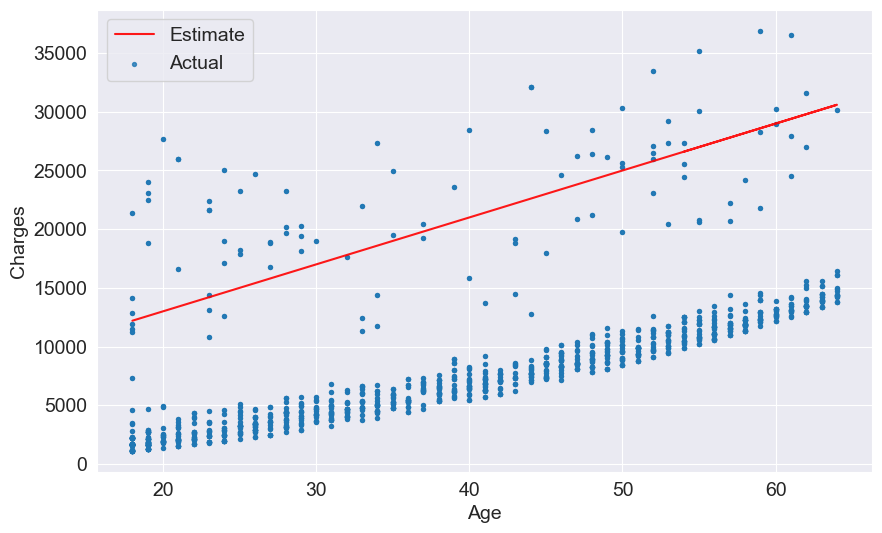

In [35]:
try_parameters(400, 5000)

In [37]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [38]:
w = 50
b = 100

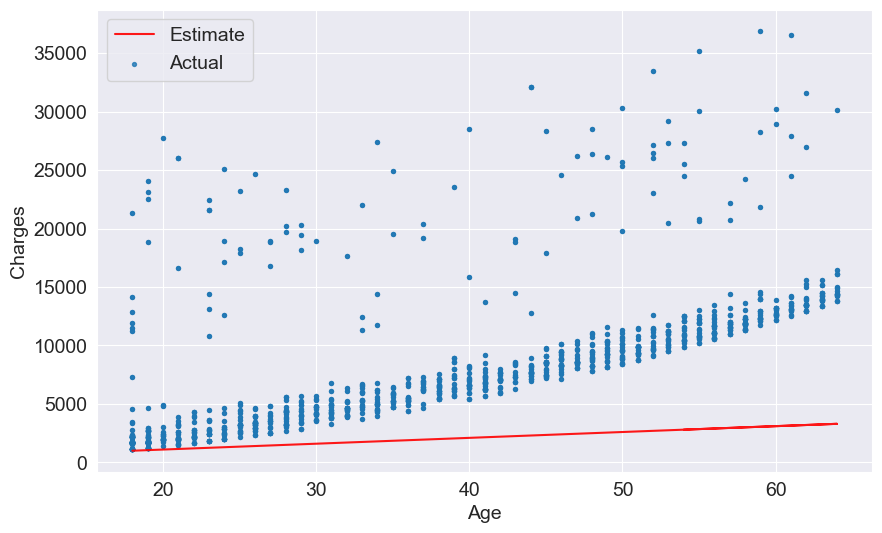

In [39]:
try_parameters(w, b)

In [40]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [41]:
rmse(targets, predicted)

np.float64(8471.933919324138)

In [42]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  5044.178319883891


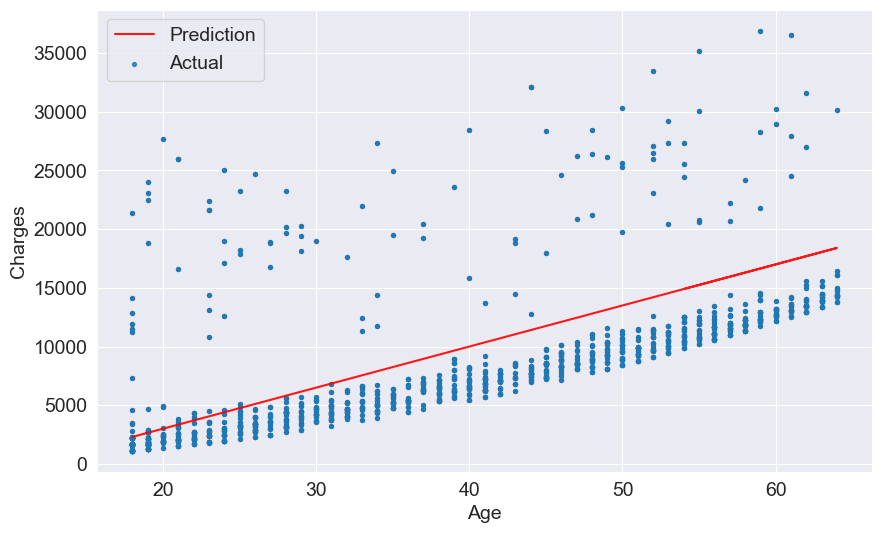

In [45]:
try_parameters(350, -4000)

<h3>Linear Regression using Scikit-learn

</h3>

In [46]:
from sklearn.linear_model import LinearRegression

<h3>First, we create a new model object.</h3>

In [47]:
model = LinearRegression()

<h3>Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.</h3>

In [48]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



<h3>Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.</h3>

In [49]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (2208, 1)
targes.shape : (2208,)


<h3>Let's fit the model to the data.</h3>

In [50]:
model.fit(inputs, targets)

LinearRegression()

<h3>We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61</h3>

In [51]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4111.21547542,  7815.78585112, 14166.47792374])

<h3>Do these values seem reasonable? Compare them with the scatter plot above.

Let compute the predictions for the entire set of inputs</h3>

In [52]:
predictions = model.predict(inputs)

In [53]:
predictions

array([ 2788.15462696,  5434.27632388,  6757.33717235, ...,
        3581.99113603,  4111.21547542, 12314.19273589])

<h3>Let's compute the RMSE loss to evaluate the model.</h3>

In [54]:
rmse(targets, predictions)

np.float64(4714.536974891454)

<p>Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.</p>

<p>The parameters of the model are stored in the `coef_` and `intercept_` properties.</p>

In [55]:
# w
model.coef_

array([264.61216969])

In [56]:
# b
model.intercept_

np.float64(-1974.8644275087008)

<p>Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.</p>

RMSE Loss:  4714.536974891454


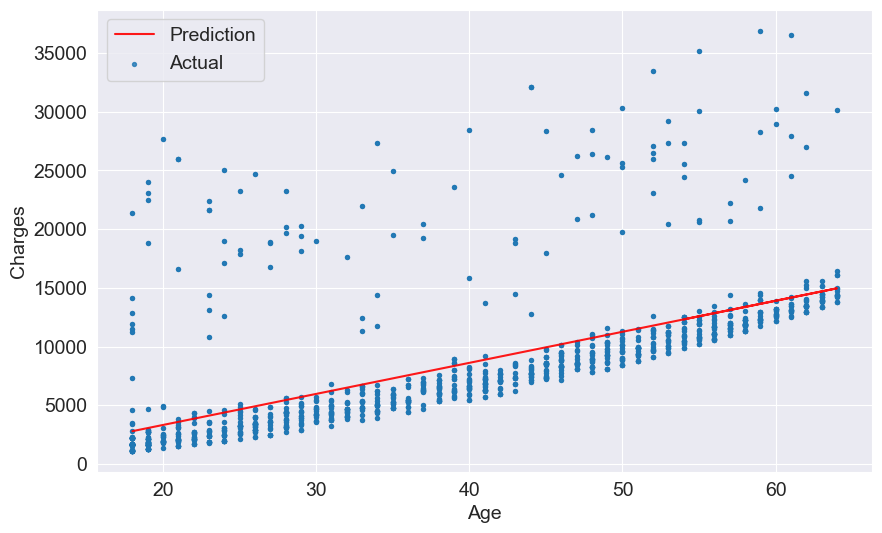

In [57]:
try_parameters(model.coef_, model.intercept_)

<h3>SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique</h3>

In [59]:
inputs = non_smoker_df[['age']]  # Selecting 'age' column as input
targets = non_smoker_df['charges']  # Selecting 'charges' column as target

<p>Check shapes of inputs and targets</p>

In [60]:
print('inputs.shape:', inputs.shape)
print('targets.shape:', targets.shape)

inputs.shape: (2208, 1)
targets.shape: (2208,)


<p>Initialize and train SGDRegressor</p>

In [61]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(inputs, targets)

SGDRegressor(random_state=42)

<p>Make predictions on the training data</p>

In [62]:
predictions_train_sgd = sgd_regressor.predict(inputs)

<p>Calculate RMSE for SGDRegressor</p>

In [63]:
rmse_sgd = np.sqrt(mean_squared_error(targets, predictions_train_sgd))
print('SGD Regressor RMSE on training data:', rmse_sgd)


SGD Regressor RMSE on training data: 5116.917405091534


<p>Coefficients and intercept for SGDRegressor</p>

In [64]:
print('SGD Coefficient (w):', sgd_regressor.coef_[0])
print('SGD Intercept (b):', sgd_regressor.intercept_)


SGD Coefficient (w): 192.1795287666983
SGD Intercept (b): [-836.26750632]


RMSE Loss:  4714.536974891454


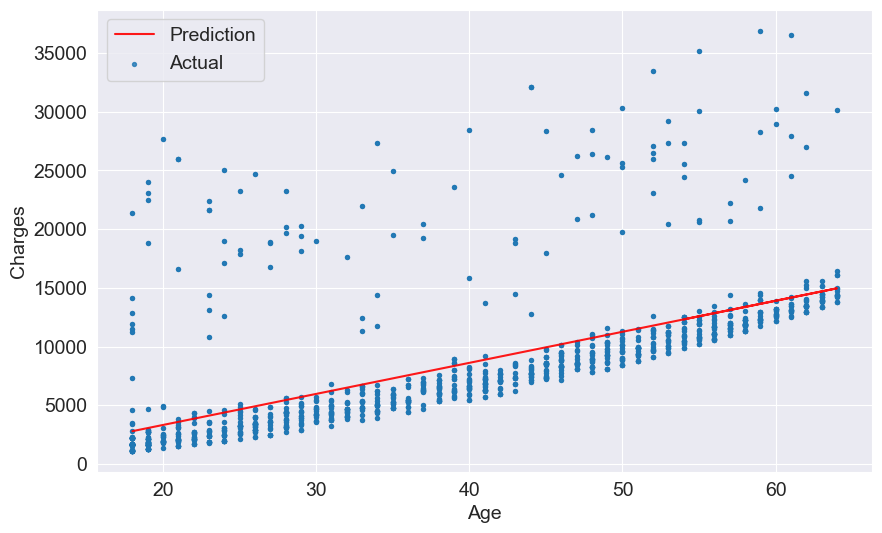

In [65]:
try_parameters(model.coef_, model.intercept_)

<h3>Linear Regression using Multiple Features
</h3>

<p>Create inputs and targets</p>

In [66]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']



<p>Create and train the model</p>

In [67]:
model = LinearRegression().fit(inputs, targets)


<p>Generate predictions</p>

In [68]:
predictions = model.predict(inputs)


<p>Compute loss to evalute the model</p>

In [69]:
loss = rmse(targets, predictions)
print('Loss:', loss)


Loss: 4714.534426939799


<p>As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.</p>

In [70]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.07699235297055058)

In [71]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

<p>We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.</p>

In [73]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

<p>You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss. 

Let's also check the parameters of the model.</p>

In [74]:
model.coef_, model.intercept_

(array([264.65603871,  -0.81289332]), np.float64(-1951.6594032323592))

<p>Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$</p>

In [75]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13506718103134346)

In [76]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()